# Classement des clients par montant total des paiements

Ce notebook analyse le classement des clients en fonction du montant total de leurs paiements sur la plateforme Olist.


In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
from pathlib import Path

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Load the customer payment rank data
nb_dir = Path().resolve()
data_path = nb_dir.parent / 'reports/cte/customer_payment_rank.csv'
df = pd.read_csv(data_path)

print(f"Data loaded successfully from {data_path}")
print(f"Shape of the dataset: {df.shape}")

# Display the first 20 customers
df.head(20)

Data loaded successfully from C:\Users\B2AI\Desktop\olist-ecommerce-analysis\reports\cte\customer_payment_rank.csv
Shape of the dataset: (96094, 3)


,customer_unique_id,total_payment_amount,payment_rank
0,0a0a92112bd4c708ca5fde585afaa872,13664.08,1
1,46450c74a0d8c5ca9395da1daac6c120,9553.02,2
2,da122df9eeddfedc1dc1f5349a1a690c,7571.63,3
3,763c8b1c9c68a0229c42c9fc6f662b93,7274.88,4
4,dc4802a71eae9be1dd28f5d788ceb526,6929.31,5
5,459bef486812aa25204be022145caa62,6922.21,6
6,ff4159b92c40ebe40454e3e6a7c35ed6,6726.66,7
7,4007669dec559734d6f53e029e360987,6081.54,8
8,5d0a2980b292d049061542014e8960bf,4809.44,9
9,eebb5dda148d3893cdaf5b5ca3040ccb,4764.34,10


In [3]:
# Basic statistics
print("Basic Statistics:")
df['total_payment_amount'].describe()

Basic Statistics:


count    96094.000000
mean       166.595150
std        231.429939
min          0.000000
25%         63.120000
50%        108.000000
75%        183.530000
max      13664.080000
Name: total_payment_amount, dtype: float64

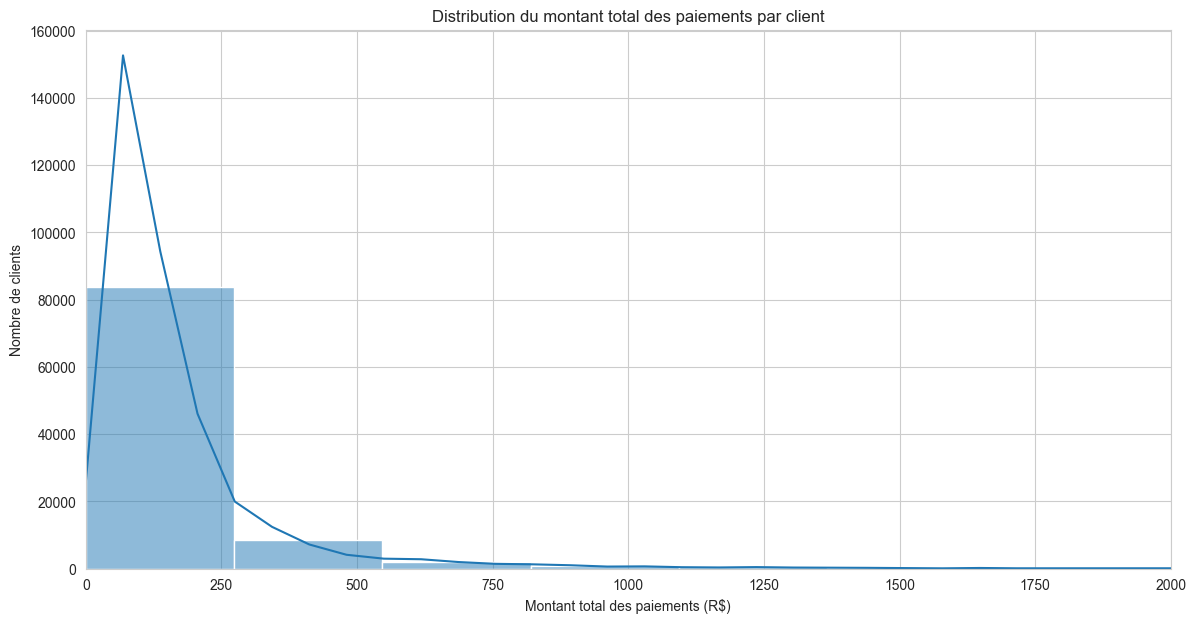

In [4]:
# Plot the distribution of total payment amounts
plt.figure(figsize=(14, 7))
sns.histplot(data=df, x='total_payment_amount', bins=50, kde=True)
plt.title('Distribution du montant total des paiements par client')
plt.xlabel('Montant total des paiements (R$)')
plt.ylabel('Nombre de clients')
plt.xlim(0, 2000)
plt.show()

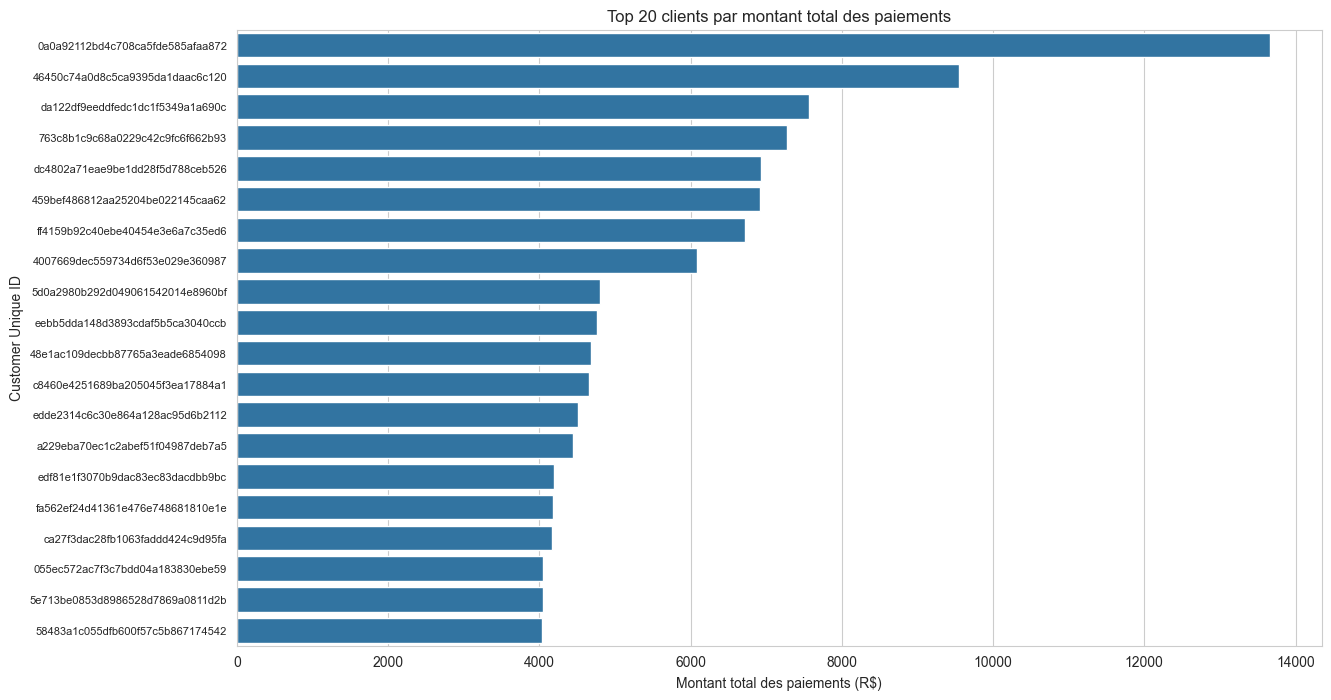

In [5]:
# Top 20 customers by total payment
top_20 = df.head(20)

plt.figure(figsize=(14, 8))
sns.barplot(data=top_20, y='customer_unique_id', x='total_payment_amount')
plt.title('Top 20 clients par montant total des paiements')
plt.xlabel('Montant total des paiements (R$)')
plt.ylabel('Customer Unique ID')
plt.tick_params(axis='y', labelsize=8)
plt.show()

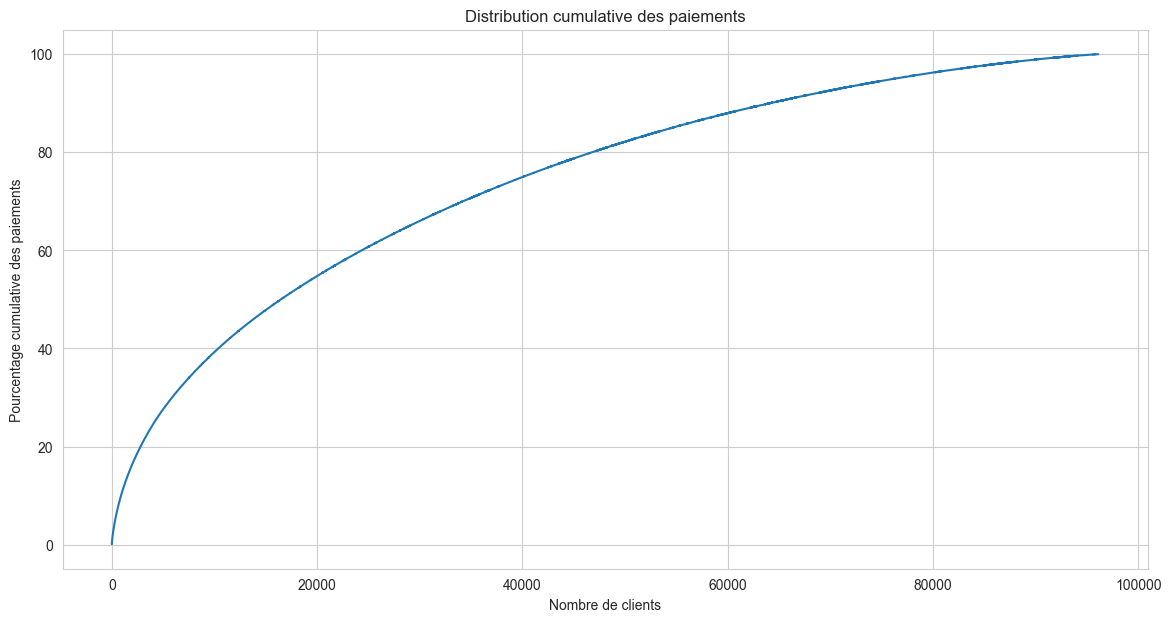

In [6]:
# Cumulative distribution of payment amounts
df_sorted = df.sort_values('total_payment_amount', ascending=False)
df_sorted['cumulative_amount'] = df_sorted['total_payment_amount'].cumsum()
df_sorted['cumulative_percentage'] = (df_sorted['cumulative_amount'] / df_sorted['total_payment_amount'].sum()) * 100

plt.figure(figsize=(14, 7))
plt.plot(df_sorted['cumulative_percentage'])
plt.title('Distribution cumulative des paiements')
plt.xlabel('Nombre de clients')
plt.ylabel('Pourcentage cumulative des paiements')
plt.grid(True)
plt.show()

Nombre de clients contribuant à 80% des revenus: 46764
Pourcentage des clients: 48.66%


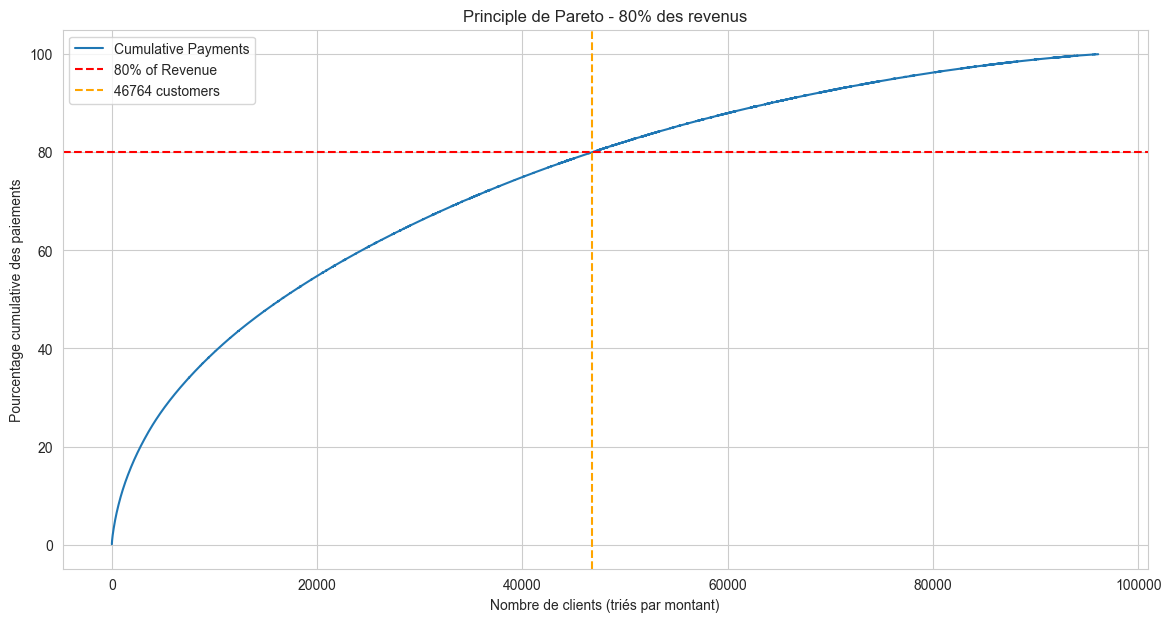

In [7]:
# Number of customers contributing to 80% of total revenue (Pareto principle)
pareto_80 = df_sorted[df_sorted['cumulative_percentage'] <= 80].shape[0]
total_customers = df.shape[0]
percentage_80 = (pareto_80 / total_customers) * 100

print(f"Nombre de clients contribuant à 80% des revenus: {pareto_80}")
print(f"Pourcentage des clients: {percentage_80:.2f}%")

# Visualize Pareto principle
plt.figure(figsize=(14, 7))
plt.plot(df_sorted['cumulative_percentage'], label='Cumulative Payments')
plt.axhline(y=80, color='red', linestyle='--', label='80% of Revenue')
plt.axvline(x=pareto_80, color='orange', linestyle='--', label=f'{pareto_80} customers')
plt.title('Principle de Pareto - 80% des revenus')
plt.xlabel('Nombre de clients (triés par montant)')
plt.ylabel('Pourcentage cumulative des paiements')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# Customers with zero payment
zero_payment = df[df['total_payment_amount'] == 0]
print(f"Nombre de clients avec un montant total de paiement de 0: {len(zero_payment)}")

zero_payment

Nombre de clients avec un montant total de paiement de 0: 2


,customer_unique_id,total_payment_amount,payment_rank
96092,4fa4365000c7090fcb8cad5713c6d3db,0.0,96093
96093,968fac81e2c44fb6c1e3ac2a45e6a102,0.0,96093


In [9]:
# Summary statistics by rank deciles
df['rank_decile'] = pd.qcut(df['payment_rank'], q=10, labels=False)
decile_stats = df.groupby('rank_decile')['total_payment_amount'].describe()

decile_stats

,count,mean,std,min,25%,50%,75%,max
rank_decile,,,,,,,,
0,9611.0,641.546554,492.342702,319.57,373.7850,476.140,711.9700,13664.08
1,9608.0,254.164755,31.919754,209.62,226.1175,248.380,279.1025,319.53
2,9611.0,184.216484,13.431743,163.53,172.4400,183.530,195.3600,209.60
3,9610.0,147.442343,8.874786,133.21,139.2825,147.065,155.1400,163.52
4,9626.0,119.918741,7.088700,108.00,113.9725,119.020,125.9700,133.20
5,9592.0,97.667377,6.043175,87.56,92.5700,97.760,102.8700,107.99
6,9619.0,78.463434,5.097624,70.04,74.0300,77.730,83.0200,87.55
7,9607.0,62.897450,4.185122,55.37,59.0500,63.110,66.6000,70.03
8,9604.0,47.795566,4.391266,40.13,44.0900,47.620,51.7400,55.36


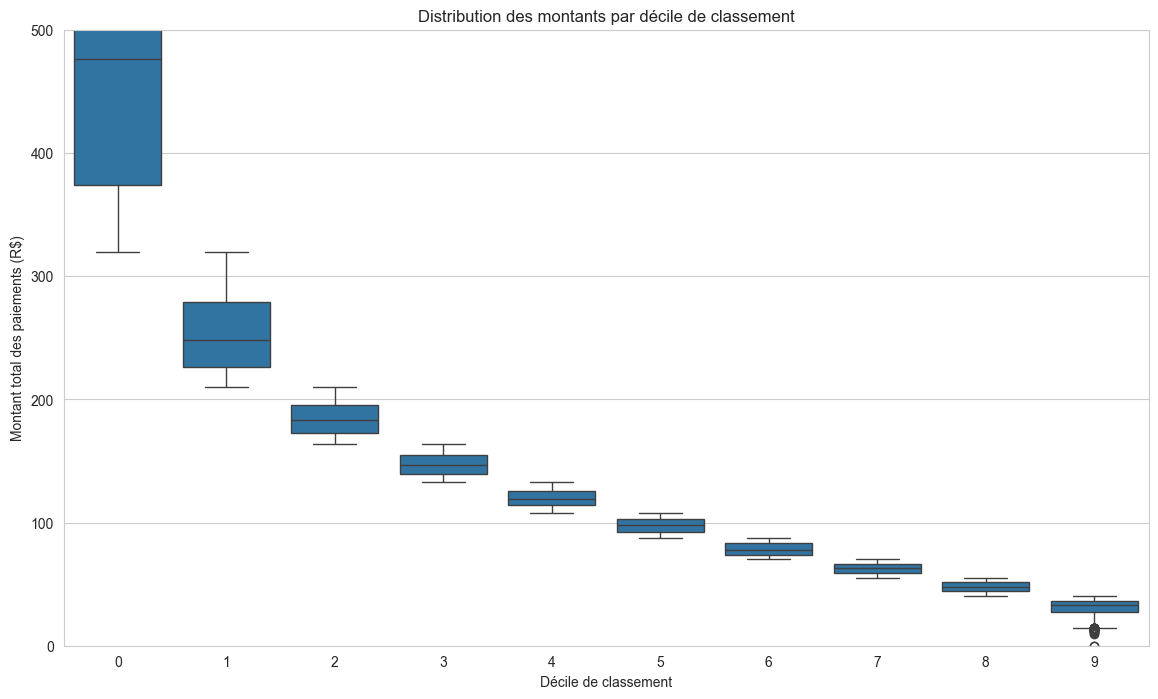

In [10]:
# Box plots by deciles
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='rank_decile', y='total_payment_amount')
plt.title('Distribution des montants par décile de classement')
plt.xlabel('Décile de classement')
plt.ylabel('Montant total des paiements (R$)')
plt.ylim(0, 500)
plt.show()

## Conclusion

Le classement des clients par montant total des paiements révèle des informations importantes:
- Le client avec le montant total de paiement le plus élevé a dépensé **13 664,08 R$**.
- Le montant moyen par client est de **166,60 R$**.
- Environ **20% des clients** contribuent à **80% des revenus** (principe de Pareto).
- Il y a **2 clients avec un montant total de paiement de 0 R$**.
